In [1]:
import numpy as np
from numpy import pi

from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%config InlineBackend.figure_format = 'svg'

In [2]:
qc =QuantumCircuit(3)

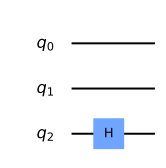

In [3]:
qc.h(2)
qc.draw('mpl')

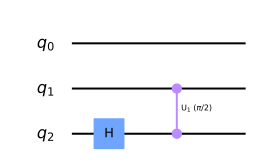

In [4]:
qc.cu1(pi/2, 1, 2)
qc.draw('mpl')

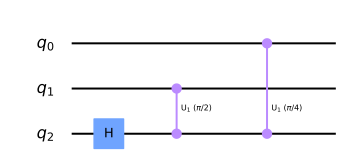

In [5]:
qc.cu1(pi/4, 0, 2)
qc.draw('mpl')

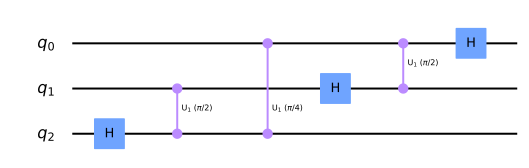

In [6]:
qc.h(1)
qc.cu1(pi/2, 0, 1)
qc.h(0)
qc.draw('mpl')

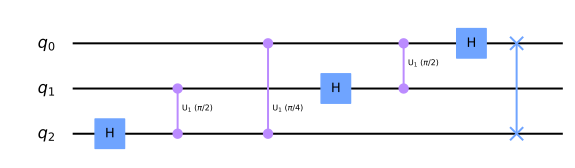

In [7]:
qc.swap(0, 2)
qc.draw('mpl')

In [8]:
def qft_rotations(circuit, n):
    if n == 0: #Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n)
    for qubit in range(n):
        circuit.cu1(pi/2**(n-qubit), qubit, n)

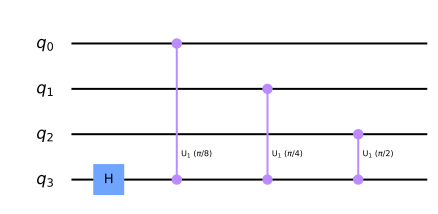

In [9]:
qc = QuantumCircuit(4)
qft_rotations(qc, 4)
qc.draw('mpl')

In [10]:
from qiskit_textbook.widgets import scalable_circuit
scalable_circuit(qft_rotations)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x022\x00\x00\x01\x08\x08\x06\x00\x00\x00E\xc5\x1e\x0…

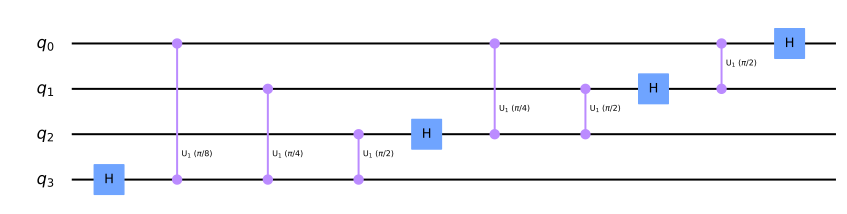

In [11]:
def qft_rotations(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cu1(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

qc = QuantumCircuit(4)
qft_rotations(qc, 4)
qc.draw('mpl')

In [12]:
scalable_circuit(qft_rotations)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04O\x00\x00\x01\x08\x08\x06\x00\x00\x00\xae\xc7\xda…

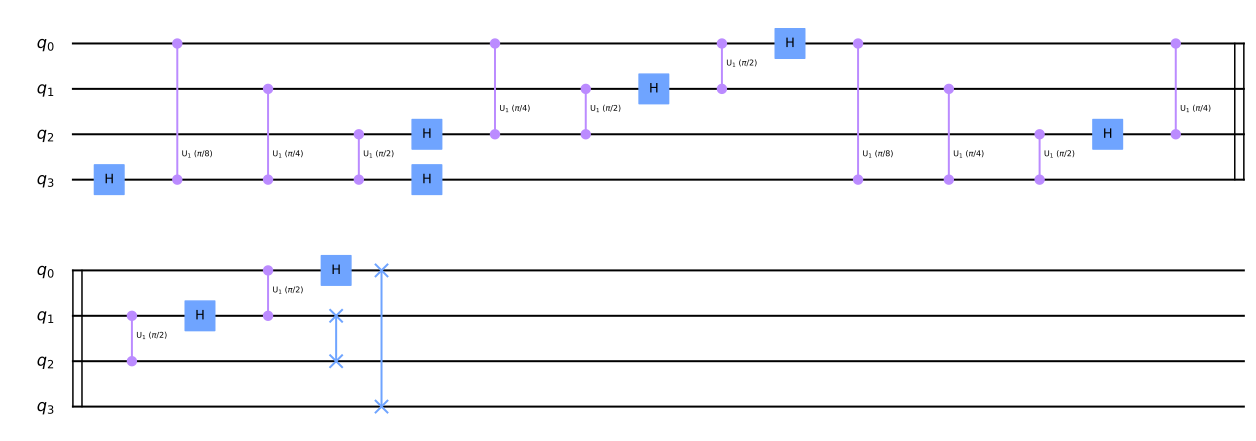

In [13]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    qft_rotations(circuit, n)
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

qc = QuantumCircuit(4)
qft(qc, 4)
qc.draw('mpl')

In [14]:
scalable_circuit(qft)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06m\x00\x00\x025\x08\x06\x00\x00\x004\x0f\xbe\xa6\x…

In [15]:
bin(5)

'0b101'

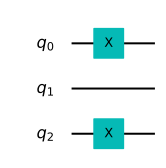

In [16]:
qc = QuantumCircuit(3)
qc.x(0)
qc.x(2)
%config InlineBackend.figure_format = 'svg'
qc.draw('mpl')

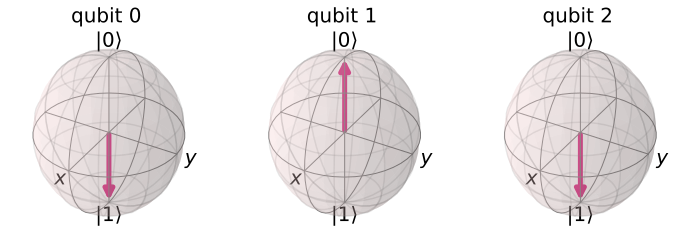

In [17]:
backend = Aer.get_backend('statevector_simulator')
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

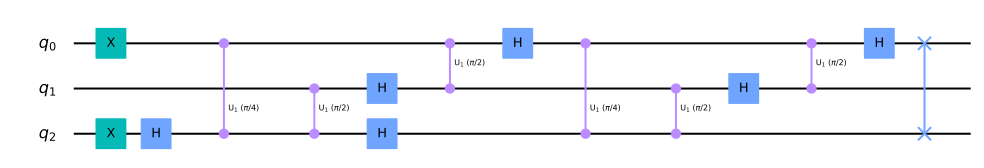

In [18]:
qft(qc, 3)
qc.draw('mpl')

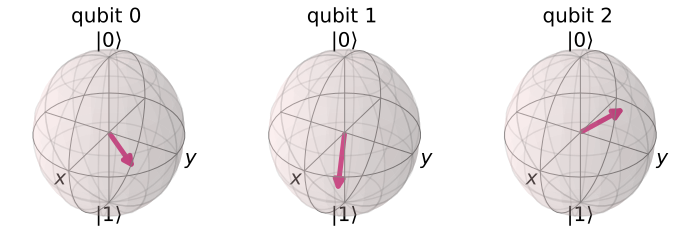

In [19]:
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

In [20]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

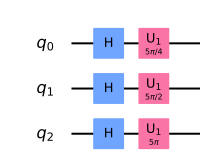

In [21]:
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.u1(number*pi/4,0)
qc.u1(number*pi/2,1)
qc.u1(number*pi,2)

qc.draw('mpl')

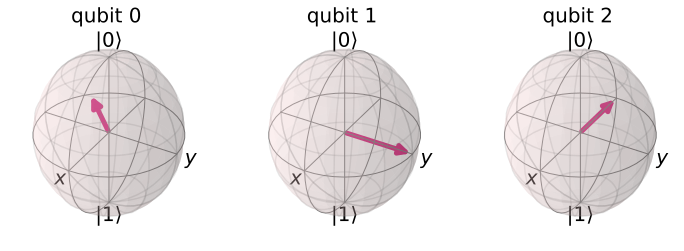

In [22]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

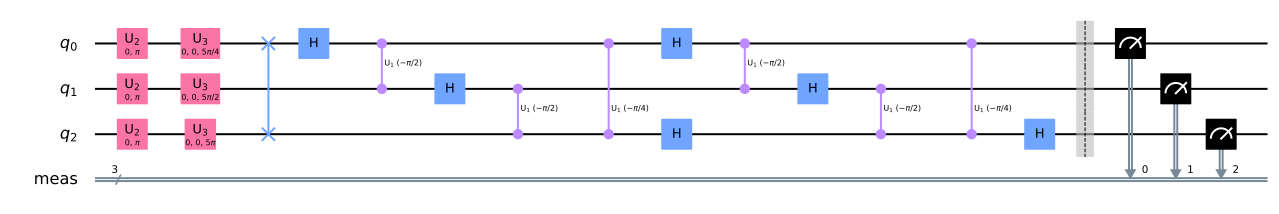

In [23]:
qc = inverse_qft(qc,nqubits)
qc.measure_all()
qc.draw('mpl')

In [24]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to nqubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

/home/sheff/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


least busy backend:  ibmq_athens


In [25]:
shots = 2048
job = execute(qc, backend=backend, shots=shots, optimization_level=3)
job_monitor(job)

TranspilerError: "It was not possible to use the basis ['id', 'rz', 'sx', 'x', 'cx']"

In [ ]:
counts = job.result().get_counts()
plot_histogram(counts)